<a href="https://colab.research.google.com/github/tonyhathuc/lab-customer-analysis-predicting-claim-amount-with-ML/blob/main/Customer_Analysis_Predicting_Claim_Amount_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab | Predicting Claim Amount with ML Linear Regression

Lab | Predicting Claim Amount with ML Linear Regression Introduction For this lab, we still keep using the marketing_customer_analysis.csv file - the US car insurance data set. You should be able to pick up where you left off in the previous rounds of customer behaviour analysis. However this time we will look to apply a linear regression machine learning model

Review the previous rounds and follow the steps as shown in previous lectures.

## Problem (case study) Familiarise yourself with Data Descriptions and the Goal

In [ ]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib notebook

# import ML models
from sklearn import linear_model
# import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

## Getting Data Read the .csv file into python

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/tonyhathuc/lab-customer-analysis-predicting-claim-amount-with-ML/main/marketing_customer_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# reassign data into df
df = data
df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df.shape
# rows, columns

(9134, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
# get basic descriptive statistics of the df
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Cleaning/Wrangling/EDA Change headers names. Deal with NaN values, replace with appropriate method.

- Split categorical Features and Numerical Features.

- Explore visually both sets of features, to identify next steps.

- Look at potential multicollinearity using a correlation matrix or other approach.

### Change header names

In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
# convert column names into lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [ ]:
# rename "employmentstatus"

df.rename(columns={"employmentstatus": "employment status"}, inplace=True)

In [ ]:
# check the results
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [ ]:
# replace space with underscore in column names
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Data types

In [ ]:
df.dtypes
# effective_to_date is a string and we will convert it into datetime

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [ ]:
# check the dtype again
df["effective_to_date"].dtype

dtype('O')

In [ ]:
# convert this column into a datetime
df["effective_to_date"] = pd.to_datetime(df["effective_to_date"])
df["effective_to_date"]

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

### Deal with NaN values

In [ ]:
df.isna().sum() # there are no nulls
#df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [ ]:
# check for nulls in %
df.isnull().sum() * 100 / len(df) # there are no nulls

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employment_status                0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

### Check for duplicates

In [ ]:
df.duplicated().sum() # there are no duplicates

0

### Split Categorical Features and Numerical Features

In [ ]:
# let's get the numerical features first
X_num = df.select_dtypes(include = np.number)
X_num.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [ ]:
# now let's get the categorical features
X_cat = df.select_dtypes(include = object)
X_cat.head(5)

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Explore visually both sets of features to identify next steps

#### Numerical features

In [ ]:
X_num.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
X_num.to_csv('X_cat.csv', index = False)

In [ ]:
X_num.hist(figsize=(15,10))
plt.suptitle("Numeric feature distribution")
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
corr = X_num.corr(method="pearson")
corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


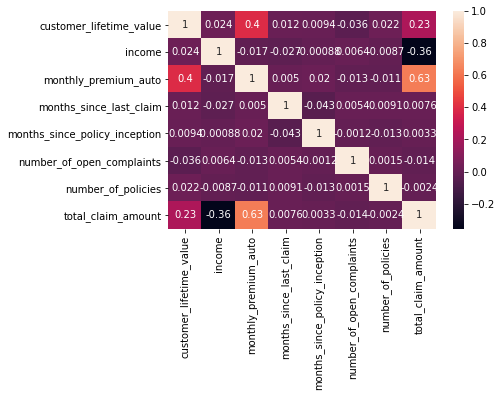

In [ ]:
%matplotlib inline
sns.heatmap(corr, annot=True)
plt.show()
# the highest correlation is between total_claim_amount and monthtly_premium_auto
# there is weak correlation between customer_lifetime_value and monthly_premium_auto

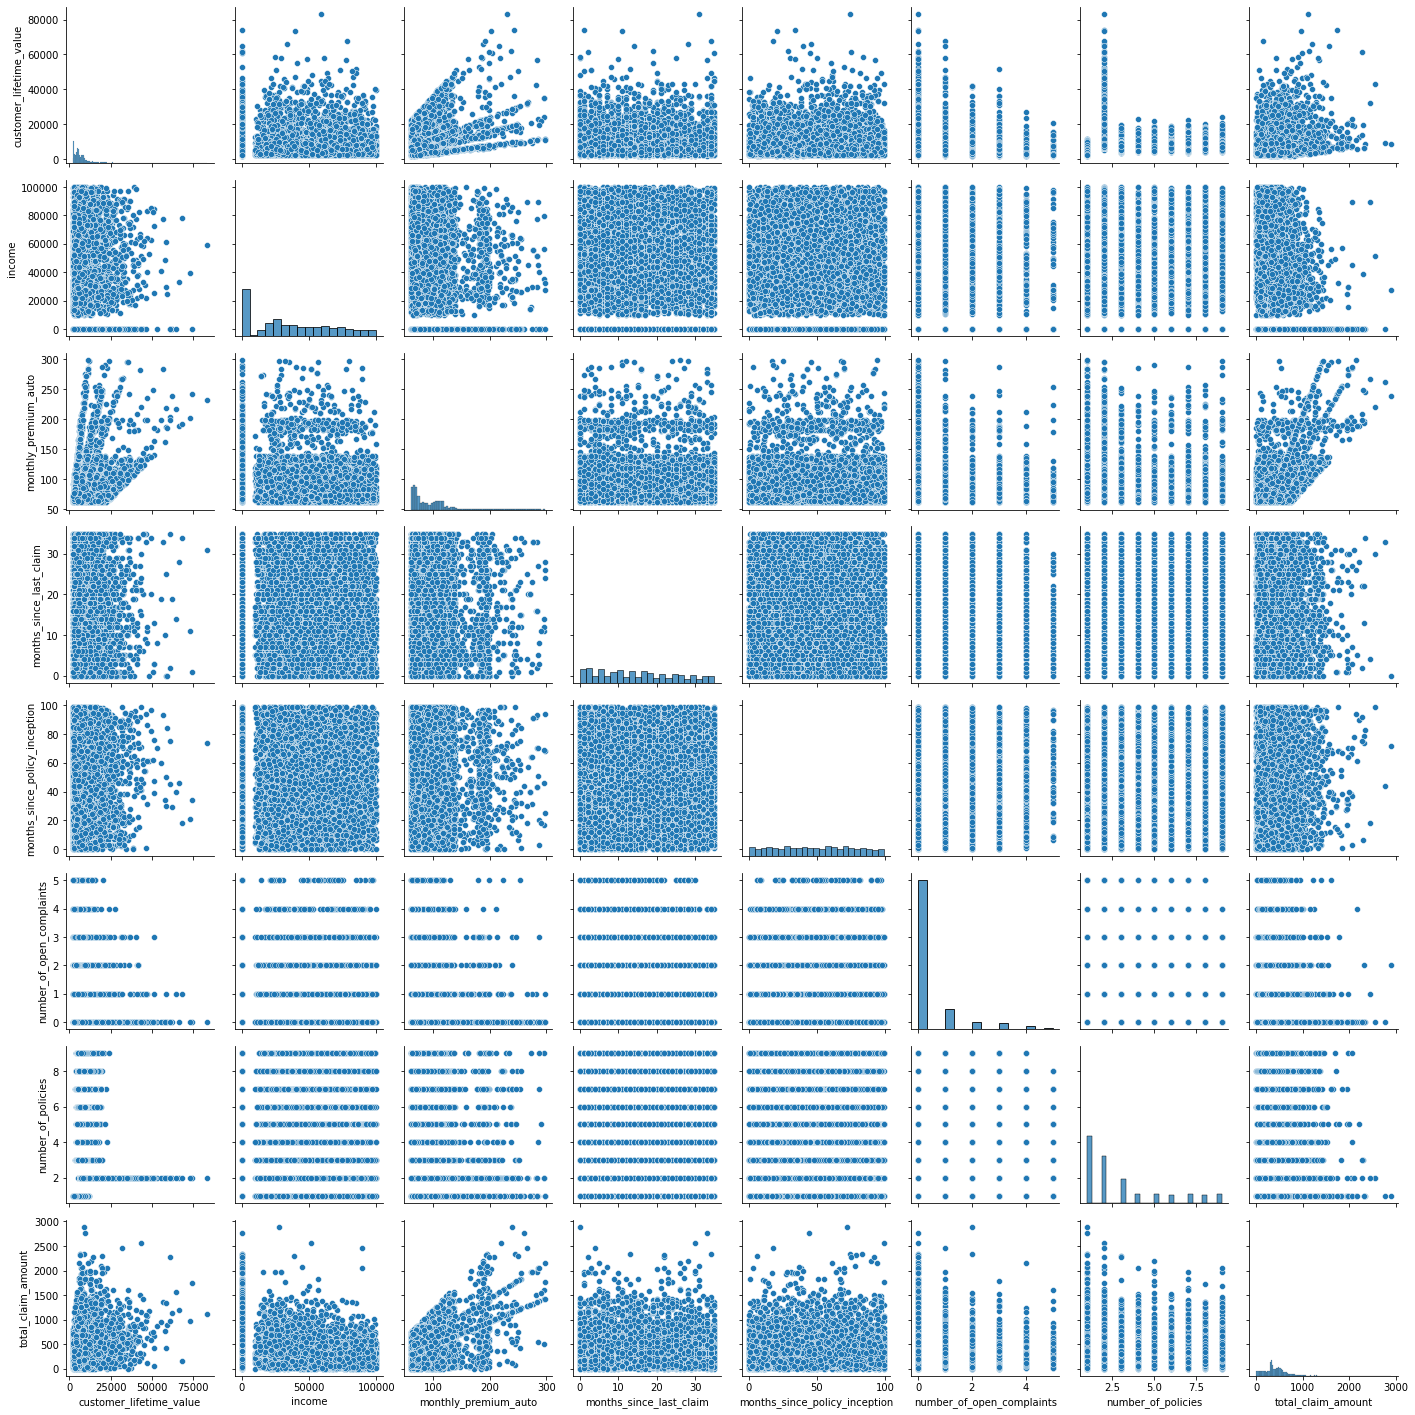

In [ ]:
sns.pairplot(X_num, kind="scatter")

#### Outliers

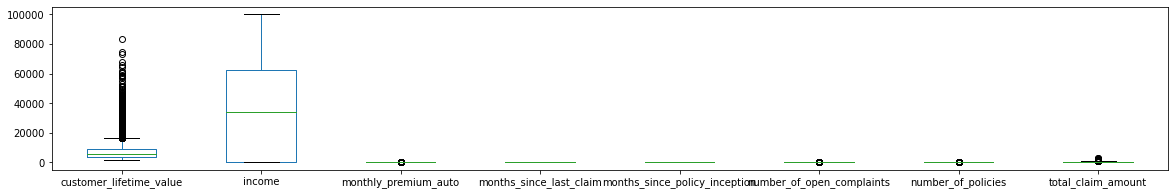

In [ ]:
df.plot(figsize=(20,3),kind="box")
# customer_lifetime_value shows a lot of outliers

#### Categorical features

In [ ]:
X_cat.describe()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,AA34092,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [ ]:
X_cat.head(5)

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
X_cat.to_csv('X_cat.csv', index = False )

Text(0.5, 1.0, 'Response Rate of Sales Channel')

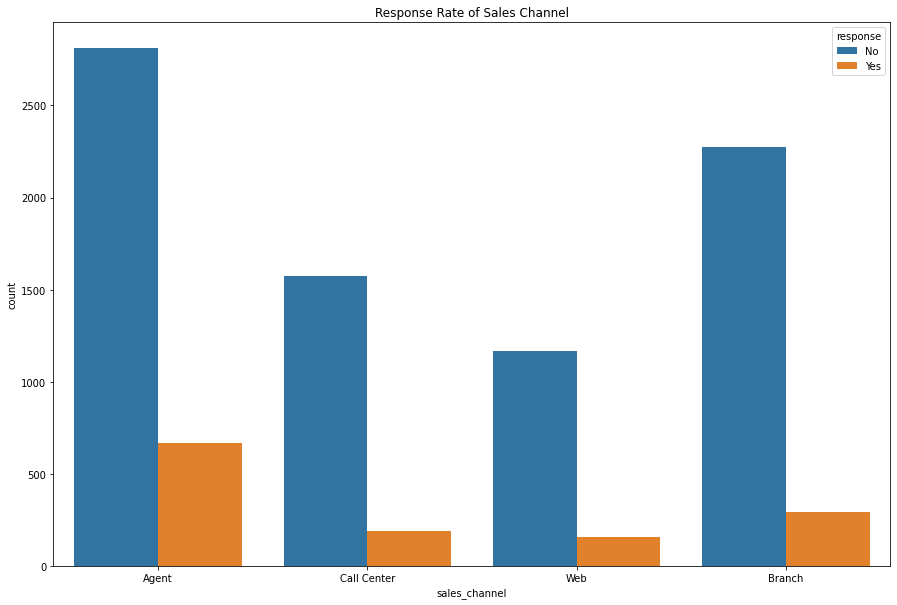

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = "sales_channel", hue = "response", data = df)
plt.title("Response Rate of Sales Channel")

Text(0.5, 1.0, 'Relationship between Employment Status and Education')

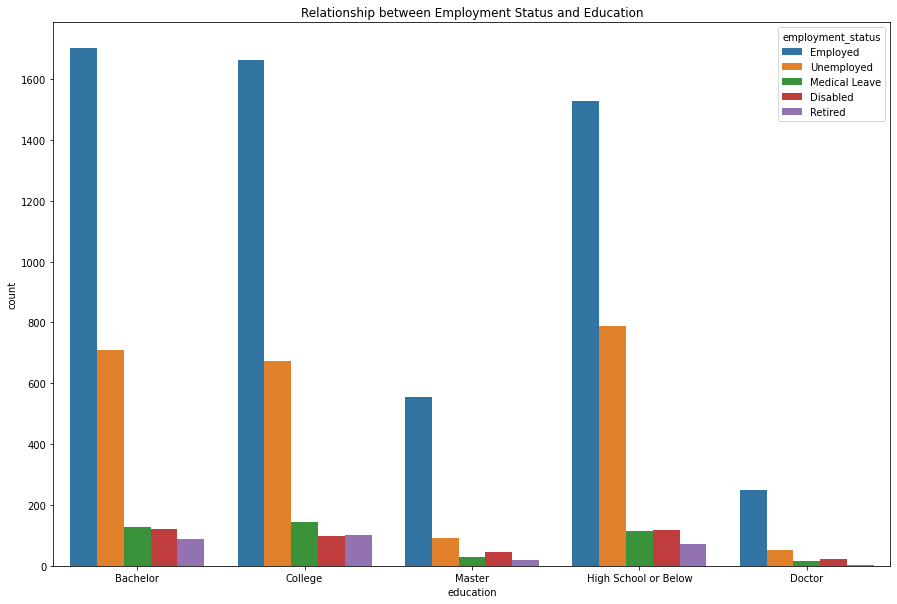

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = "education", hue = "employment_status", data = df)
plt.title("Relationship between Employment Status and Education")

Text(0.5, 1.0, 'Gender and Education')

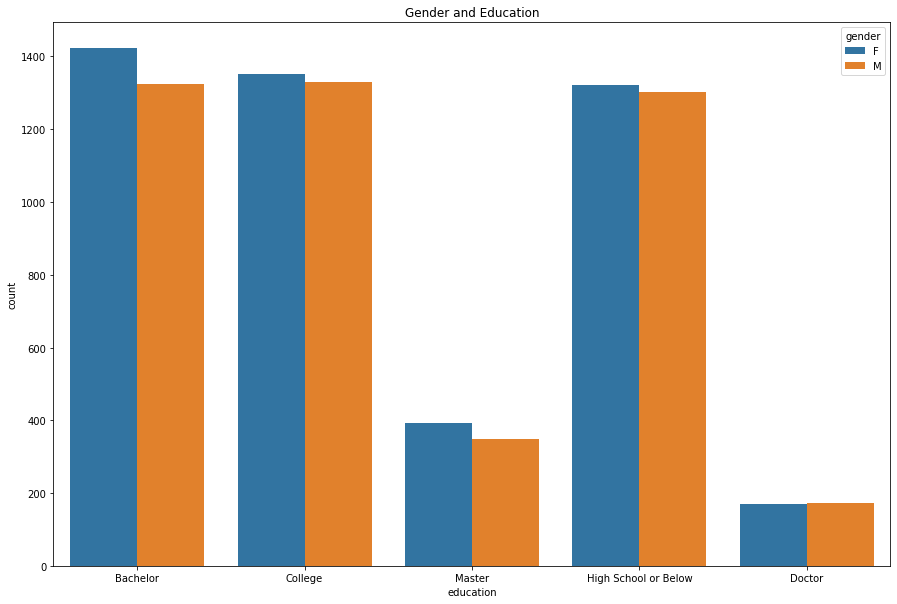

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = "education", hue = "gender", data = df)
plt.title("Gender and Education")

## Pre-Processing Data Dealing with outliers. Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.

### Normalization

#### MinMax scaler on "effective_to_date"

In [ ]:
df["effective_to_date"].shape

(9134,)

In [ ]:
# df["effective_to_date"].to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data2 = df['effective_to_date'].to_numpy()
print(data2)

['2011-02-24T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-19T00:00:00.000000000' ... '2011-02-06T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-02-14T00:00:00.000000000']


In [ ]:
# define min max scaler
min_max_scaler = MinMaxScaler()
# transform data
min_max_scaled = min_max_scaler.fit_transform(data2.reshape(-1,1))
print(min_max_scaled)

[[0.93103448]
 [0.51724138]
 [0.84482759]
 ...
 [0.62068966]
 [0.56896552]
 [0.75862069]]


In [ ]:
effective_to_date = pd.DataFrame(data = min_max_scaled)
effective_to_date

,0
0,0.931034
1,0.517241
2,0.844828
3,0.327586
4,0.568966
...,...
9129,0.689655
9130,0.724138
9131,0.620690
9132,0.568966


#### Standard Scaler on numerical **columns**

In [ ]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data3 = asarray(X_num)
print(data3)

[[2.76351928e+03 5.62740000e+04 6.90000000e+01 ... 0.00000000e+00
  1.00000000e+00 3.84811147e+02]
 [6.97953590e+03 0.00000000e+00 9.40000000e+01 ... 0.00000000e+00
  8.00000000e+00 1.13146493e+03]
 [1.28874317e+04 4.87670000e+04 1.08000000e+02 ... 0.00000000e+00
  2.00000000e+00 5.66472247e+02]
 ...
 [8.16389043e+03 0.00000000e+00 8.50000000e+01 ... 3.00000000e+00
  2.00000000e+00 7.90784983e+02]
 [7.52444244e+03 2.19410000e+04 9.60000000e+01 ... 0.00000000e+00
  3.00000000e+00 6.91200000e+02]
 [2.61183687e+03 0.00000000e+00 7.70000000e+01 ... 0.00000000e+00
  1.00000000e+00 3.69600000e+02]]


In [ ]:
# define standard scaler
scaler = StandardScaler()
# transform data
standard_scaled = scaler.fit_transform(data3)
print(standard_scaled)

[[-0.76287773  0.61282744 -0.70392465 ... -0.42224956 -0.82264788
  -0.16963969]
 [-0.14924546 -1.23961684  0.02269103 ... -0.42224956  2.10615996
   2.400737  ]
 [ 0.71063622  0.36570978  0.42959581 ... -0.42224956 -0.40424676
   0.45573376]
 ...
 [ 0.02313483 -1.23961684 -0.23889062 ...  2.87324529 -0.40424676
   1.22793667]
 [-0.06993547 -0.51735647  0.08082028 ... -0.42224956  0.01415436
   0.88511256]
 [-0.78495478 -1.23961684 -0.47140763 ... -0.42224956 -0.82264788
  -0.22200449]]


In [ ]:
data3.shape, data2.shape, 

((9134, 8), (9134,))

In [ ]:
X_num2 = pd.DataFrame(standard_scaled)
X_num2

,0,1,2,3,4,5,6,7
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


### Encoding Categorical Data fields using OHE


In [ ]:
X_cat.shape

(9134, 15)

In [ ]:
# Encoding the categorical data
from numpy import array
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder
# create one hot encoder object
onehotencoder = OneHotEncoder()
# define data4 
data4 = array(X_cat)
print(data4)

[['BU79786' 'Washington' 'No' ... 'Agent' 'Two-Door Car' 'Medsize']
 ['QZ44356' 'Arizona' 'No' ... 'Agent' 'Four-Door Car' 'Medsize']
 ['AI49188' 'Nevada' 'No' ... 'Agent' 'Two-Door Car' 'Medsize']
 ...
 ['TD14365' 'California' 'No' ... 'Branch' 'Four-Door Car' 'Medsize']
 ['UP19263' 'California' 'No' ... 'Branch' 'Four-Door Car' 'Large']
 ['Y167826' 'California' 'No' ... 'Call Center' 'Two-Door Car' 'Medsize']]


In [ ]:
X_cat.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
X_cat.value_counts()

customer  state       response  coverage  education             employment_status  gender  location_code  marital_status  policy_type     policy        renew_offer_type  sales_channel  vehicle_class  vehicle_size
ZZ97035   California  No        Extended  College               Unemployed         M       Suburban       Single          Corporate Auto  Corporate L1  Offer1            Branch         Luxury Car     Small           1
IS21172   Oregon      Yes       Extended  Bachelor              Medical Leave      F       Suburban       Married         Personal Auto   Personal L1   Offer2            Agent          SUV            Small           1
IS53899   Nevada      No        Extended  College               Employed           F       Suburban       Married         Personal Auto   Personal L3   Offer1            Branch         Four-Door Car  Medsize         1
IS50283   California  No        Basic     Bachelor              Employed           F       Suburban       Married         Corporate A

In [ ]:
# One-hot-encode categorical data 
X_cat2 = pd.get_dummies(data4)

Exception: ignored

In [ ]:
X_cat2.sample(5)

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,customer_AB21519,customer_AB23825,customer_AB26022,customer_AB31813,customer_AB45325,customer_AB60627,customer_AB62982,customer_AB69140,customer_AB72731,customer_AB73565,customer_AB78984,customer_AB96670,customer_AB98823,customer_AC13887,customer_AC22873,customer_AC24378,customer_AC40767,customer_AC42963,customer_AC58002,customer_AC67315,customer_AC73173,customer_AC75391,customer_AC79024,customer_AD12500,customer_AD18174,customer_AD28349,customer_AD28535,customer_AD33653,customer_AD33971,...,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
6987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


#### Check the shapes

In [ ]:
X_cat.shape, X_num2.shape, data.shape, data2.shape, data3.shape, data4.shape

NameError: ignored

In [ ]:
standard_scaled.shape, min_max_scaled.shape

((9134, 8), (9134, 1))

### Concatenate

In [ ]:
df1 = pd.concat([min_max_scaled, standard_scaled, X_cat], ignore_index=False)
df1.sample(5)

TypeError: ignored

In [ ]:
df_total = pd.concat([X_num,X_cat], ignore_index=False)
df_total.sample(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,customer_AB21519,customer_AB23825,customer_AB26022,customer_AB31813,customer_AB45325,customer_AB60627,customer_AB62982,customer_AB69140,customer_AB72731,customer_AB73565,customer_AB78984,customer_AB96670,customer_AB98823,customer_AC13887,customer_AC22873,customer_AC24378,customer_AC40767,customer_AC42963,customer_AC58002,customer_AC67315,customer_AC73173,...,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
6700,6159.011684,97658.0,76.0,7.0,82.0,1.0,3.0,364.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8084,27528.311320,54586.0,76.0,1.0,91.0,0.0,2.0,122.590766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4651,3557.368368,17272.0,93.0,30.0,58.0,0.0,1.0,446.400000,Na

In [ ]:
df_total.isnull().sum()

customer_lifetime_value          9134
income                           9134
monthly_premium_auto             9134
months_since_last_claim          9134
months_since_policy_inception    9134
                                 ... 
vehicle_class_Sports Car         9134
vehicle_class_Two-Door Car       9134
vehicle_size_Large               9134
vehicle_size_Medsize             9134
vehicle_size_Small               9134
Length: 9199, dtype: int64